<a href="https://colab.research.google.com/github/CliffordDelaCruz/ML_study/blob/main/Hands_on_quiz_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MNIST**

In this practical application notebook, we will work with fashion MNIST dataset to carry out a classification exercise using Artificial Neural Networks.
-----------------------
## **Dataset**
---------------------------
The dataset, Fashion MNIST, is a collection of apparel images falling into several classes. 
Classes are numbered from 0 to 9 and have the following meanings with Tshirt/Top represented as 0 and an Ankle Boot as 9. 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

-------------------------
## **Objective**
--------------------------
In this exercise, we will create a simple ANN model to classify the images into some categories

-----------------------
## **Toolkit**
--------------------------
We will use TensforFlow, tensorflow implementation of keras on google colab for this exercise.

## **Loading the libraries**

In [18]:
#!pip install tensorflow

In [19]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
tf.__version__

'2.12.0'

### **Loading the Data**

Let's import the data from the tf.keras.datasets and prepare the train and the test set.

In [21]:
# Load the data
(X_train, trainY), (X_test,testY) = tf.keras.datasets.fashion_mnist.load_data()

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [23]:
X_train.shape[1] * X_train.shape[2]

784

- This suggests that there are 60000 images of size 28\*28 in the training set and 10000 images of size 28*28 in the test set.
- Note that we will need to flatten these images before fitting an ANN model. 
- Let us now explore the classes present in the dataset.

In [24]:
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- This suggests that the train set has 10 classes where each class denotes one type of apparel.

### **Encoding the target variable**

- We need to one hot encode the target variable to be able to form the training target vector.
- Hint: check tf.keras.utils.to_categorical() - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [25]:
y_train = tf.keras.utils.to_categorical(trainY,num_classes=10)
y_test = tf.keras.utils.to_categorical(testY,num_classes=10)

# Let's have a look at the shapes of all the datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [26]:
## Let's normalize the dataset. Since there are pixel values ranging from 0-255, let us divide by 255 to get the new ranges from 0-1
X_train = X_train/255
X_test = X_test/255

### **Visualization**
- Now, let us visualize the data items.
- We will visualize the first 24 images in the training dataset.


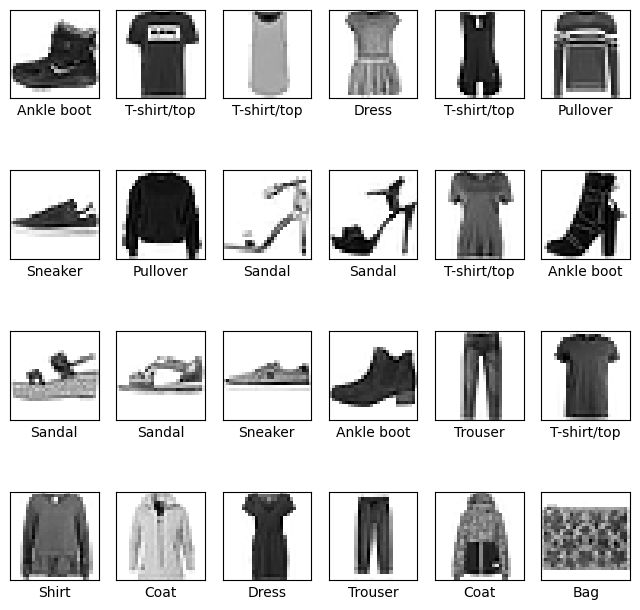

In [27]:
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(24):
    plt.subplot(4,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_list[trainY[i]])
plt.show()

### **Model Building**

- We will now start with the model building process.
- We will create a model with
 - A layer to flatten the input
 - A hidden layer with 64 nodes (You can play around with this number) and 'relu' activation.
 - Output layer

### **Model-1**

### **Question 1: Add the output layer with activation function and number of neurons required based on the problem statement.**

In [28]:
# Initialize sequential model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')   # Remove this and complete the code.
])

In [29]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


**Observations**
- The summary of the model shows each layer's name, type, output shape, and the number of parameters at that particular layer.
- It also shows the total number of trainable and non-trainable parameters in the model. A parameter whose value is learned while training the model is called a trainable parameter otherwise it is called a non-trainable parameter.
- The Flatten layer simply flattens each image into a size of 784 (28*28) and there is no learning or training at this layer. Hence, the number of parameters is 0 for the Flatten layer.
- Each image in the form of 784 nodes would be the input for the 'dense' layer. Each node of the previous layer would be connected with each node of the current layer. Also, each connection has one weight to learn and each node has one bias. So, the total number of parameters are (784*64)+64 = 50,240.
- Similarly, the last layer - 'dense_1' have (64*10)+10 = 650 parameters.

Let us now compile the model.
- We will use 'adam' optimization and 'CategoricalCrossentropy' Loss as the loss. We will track the accuracy metric.

In [30]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy',  metrics = ['accuracy'])

In [31]:
# Let us now fit the model

fit_history = model_1.fit(X_train, y_train,validation_split=0.1, verbose=1, epochs=10, batch_size=64)

Epoch 1/10
844/844 [==============================] - 8s 8ms/step - loss: 0.5547 - accuracy: 0.8091 - val_loss: 0.4388 - val_accuracy: 0.8458
Epoch 2/10
844/844 [==============================] - 4s 5ms/step - loss: 0.4105 - accuracy: 0.8557 - val_loss: 0.3984 - val_accuracy: 0.8597
Epoch 3/10
844/844 [==============================] - 4s 5ms/step - loss: 0.3722 - accuracy: 0.8697 - val_loss: 0.3628 - val_accuracy: 0.8673
Epoch 4/10
844/844 [==============================] - 5s 6ms/step - loss: 0.3487 - accuracy: 0.8752 - val_loss: 0.3483 - val_accuracy: 0.8785
Epoch 5/10
844/844 [==============================] - 4s 5ms/step - loss: 0.3314 - accuracy: 0.8807 - val_loss: 0.3486 - val_accuracy: 0.8733
Epoch 6/10
844/844 [==============================] - 4s 5ms/step - loss: 0.3125 - accuracy: 0.8875 - val_loss: 0.3448 - val_accuracy: 0.8767
Epoch 7/10
844/844 [==============================] - 5s 7ms/step - loss: 0.2990 - accuracy: 0.8916 - val_loss: 0.3527 - val_accuracy: 0.8747
Epoch 

**Observation**
- We can observe that the model's accuracy increases with the increase in the number of epochs.

### **Evaluate the model on the test set**



- Let's predict using the test data. The .predict() method in Keras models returns the probabilities of each observation belonging to each class. We will choose the class where the predicted probability is the highest.
- Also, let's build a function to print the classification report and confusion matrix.


In [32]:
def metrics_score(actual, predicted):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=class_names_list, yticklabels=class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Question 2: What is the test accuracy for the model1?**

In [33]:
model_1.evaluate(X_test, y_test, verbose = 1)
test_pred1 = np.argmax(model_1.predict(X_test), axis = -1)
test_pred1

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

### **Question 3: Which category has been most correctly classified by the model1?**

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.77      0.79      1000
           3       0.88      0.89      0.89      1000
           4       0.71      0.88      0.79      1000
           5       0.97      0.95      0.96      1000
           6       0.77      0.58      0.66      1000
           7       0.94      0.95      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



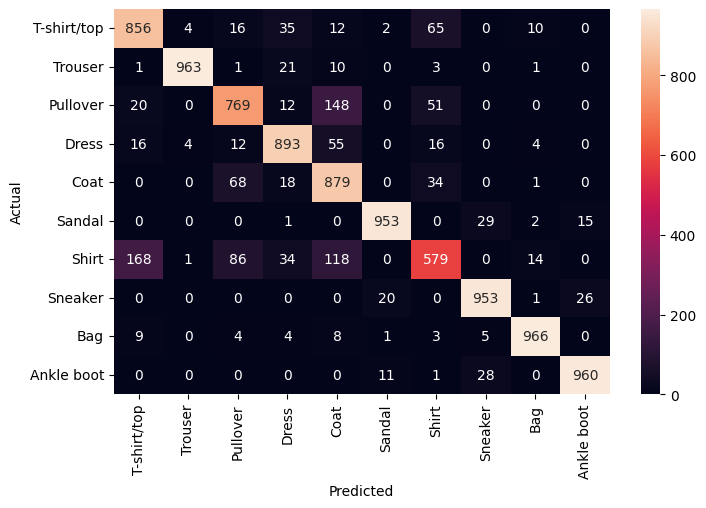

In [34]:
metrics_score(testY, test_pred1)

**Observations**
- Class 6 (Shirt) has the lowest recall and precision. The model is not able to identify the shirt. The confusion matrix shows that the model has predicted shirts as T-shirts/top, Pullover, and Coat which is understandable as these items have similar looks. 
- Let's try changing the learning rate and train the model for more epochs and see if the model can identify even subtle differences in different objects.

### **Further Iterations to model building**
- Let's change the learning rate and epochs and observe the effect on accuracy on the earlier network.
- Let's build a bigger network with the new learning rate and epochs.

### **Model-2**

In [35]:
# Initialize sequential model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [36]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


**Observation**
- The summary remains the same as the previous model because we have not changed anything about the structure of the NN.

In [ ]:
fit_history_2 = model_2.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=64, verbose = 2)

**Observations**
- We can see that the accuracy of the training data has increased by ~3% but the accuracy on the validation set has increased only by ~0.50% as compared to the model trained with 10 epochs.
- This indicates that if we further increase the number of epochs while keeping everything else the same then the model might start to overfit.

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.17      0.61      0.27      1000
           2       0.10      0.14      0.12      1000
           3       0.11      0.02      0.04      1000
           4       0.20      0.00      0.00      1000
           5       0.05      0.03      0.04      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.14      0.56      0.23      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.14     10000
   macro avg       0.08      0.14      0.07     10000
weighted avg       0.08      0.14      0.07     10000



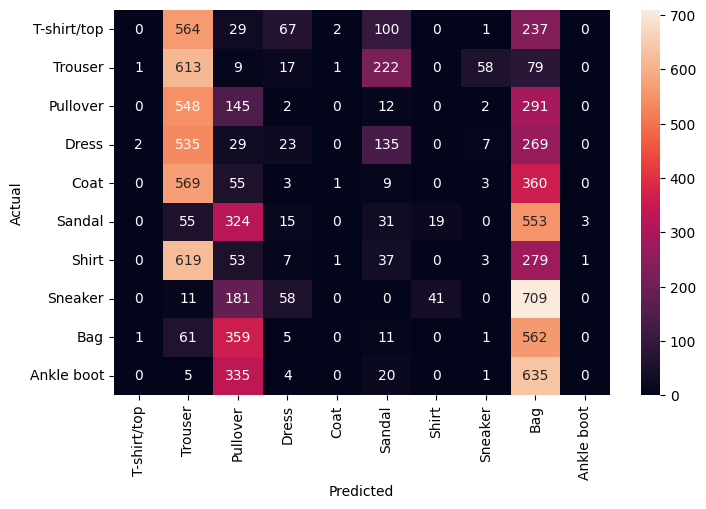

In [37]:
model_2.evaluate(X_test,y_test, verbose = 1)

test_pred2 = np.argmax(model_2.predict(X_test), axis  = -1)

metrics_score(testY, test_pred2)

### **Model-3**

### **Question 4: For the above model i.e Model2, add 1 hidden layer with 128 neurons and relu activation function after the flatten layer. The test accuracy of this model lies between,**

In [38]:
# Initialize sequential model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),  # Remove this and complete the code.
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [39]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


**Observations**
- We can see that the number of parameters has increased by ~2.15 times than the number of parameters in previous models.
- Increasing the number of parameters can significantly increase the training time of the model.

In [40]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

fit_history_3 = model_3.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=64, verbose = 1)

Epoch 1/30
844/844 [==============================] - 7s 7ms/step - loss: 0.5209 - accuracy: 0.8180 - val_loss: 0.4390 - val_accuracy: 0.8455
Epoch 2/30
844/844 [==============================] - 7s 8ms/step - loss: 0.3836 - accuracy: 0.8624 - val_loss: 0.3831 - val_accuracy: 0.8578
Epoch 3/30
844/844 [==============================] - 6s 7ms/step - loss: 0.3400 - accuracy: 0.8764 - val_loss: 0.3565 - val_accuracy: 0.8710
Epoch 4/30
844/844 [==============================] - 7s 8ms/step - loss: 0.3174 - accuracy: 0.8843 - val_loss: 0.3376 - val_accuracy: 0.8758
Epoch 5/30
844/844 [==============================] - 6s 7ms/step - loss: 0.2997 - accuracy: 0.8884 - val_loss: 0.3395 - val_accuracy: 0.8772
Epoch 6/30
844/844 [==============================] - 7s 8ms/step - loss: 0.2823 - accuracy: 0.8966 - val_loss: 0.3272 - val_accuracy: 0.8825
Epoch 7/30
844/844 [==============================] - 6s 7ms/step - loss: 0.2719 - accuracy: 0.8992 - val_loss: 0.3160 - val_accuracy: 0.8845
Epoch 

**Observations**
- The validation accuracy of the model has further increased by ~0.71% and the training accuracy has further increased by ~1.4%. So, there is still a hint of overfitting.
- We can play around with hyperparameters of the model or try different layer structures to improve the model performance and reduce the overfitting.

- We can see that accuracy keeps increasing for the test data as the number of epochs increased but validation accuracy has become somewhat constant after 10 epochs.
- This indicates that the model learns the training data more closely after each epoch but cannot replicate the performance on the validation data which is a sign of overfitting.
- The same pattern can be observed for loss as well. It keeps decreasing for the training data with the increase in epochs but becomes somewhat constant for the validation data after 10 epochs.

Now, let's make final predictions on the test data using the last model we built.

### **Final Predictions on the Test Data**

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.92      0.89      1000
           4       0.81      0.81      0.81      1000
           5       0.97      0.97      0.97      1000
           6       0.79      0.63      0.70      1000
           7       0.95      0.95      0.95      1000
           8       0.94      0.98      0.96      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



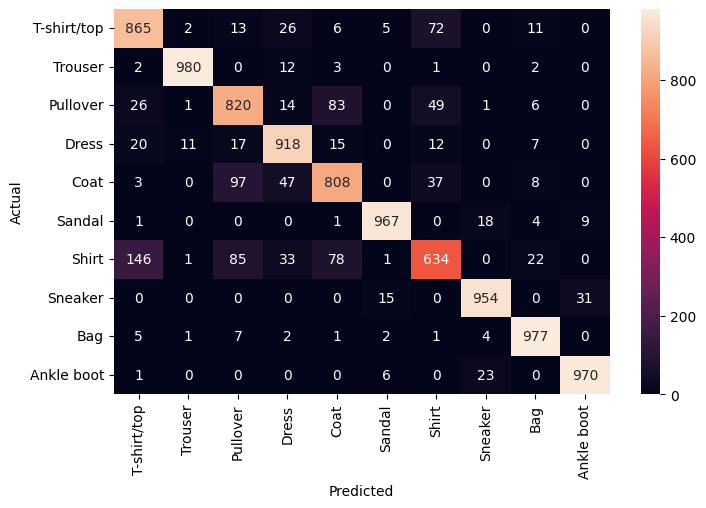

In [41]:
final_pred = np.argmax(model_3.predict(X_test), axis  = -1)

metrics_score(testY, final_pred)

- The precision and recall for class 6 (Shirt) have increased. The confusion matrix shows that the model is still not able to differentiate between T-shirt/top and Shirt but became better in differentiating Shirt with Pullover and Coat.
- The model has become even better at identifying Trouser. It has an f1-score of 98% for class 1 (Trouser).
- The overall accuracy on the test data is approximately the same as the validation accuracy.

### **Let's visualize the images from the test data.** 
- We will randomly select 24 images from the test data and visualize them.
- The title of each image would show the actual and predicted label of that image and the probability of the predicted class.
- Higher the probability more confident the model is about the prediction.

313/313 [==============================] - 1s 2ms/step


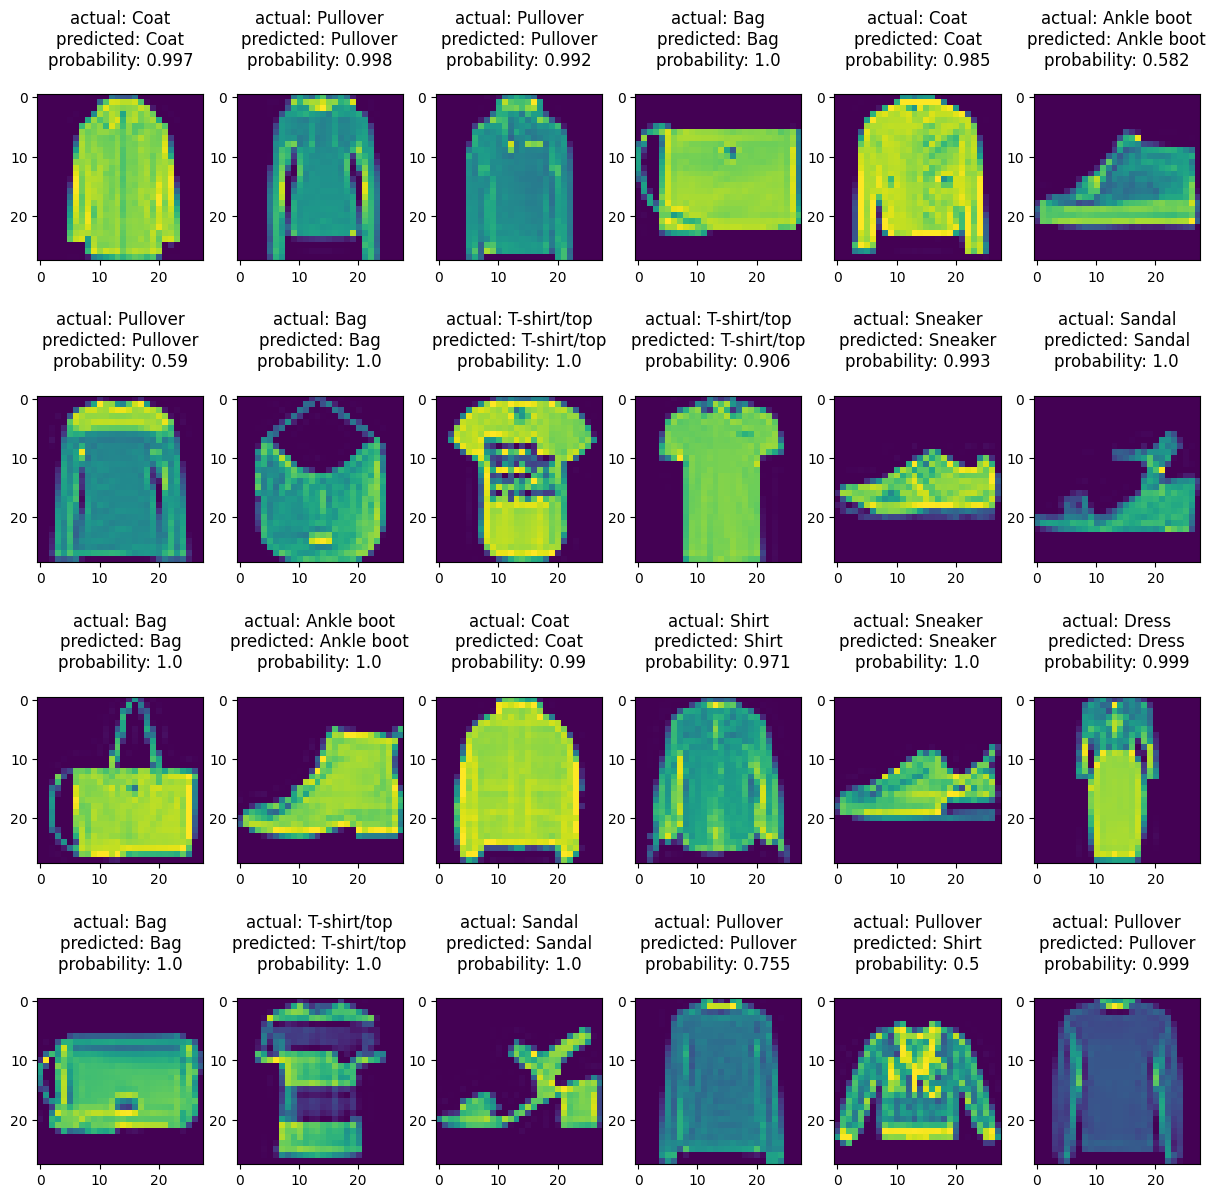

In [42]:
rows = 4
cols = 6
fig = plt.figure(figsize=(15, 15))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(testY))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[random_index, :])
        pred_label = class_names_list[final_pred[random_index]]
        true_label = class_names_list[testY[random_index]]
        y_pred_test_max_probas = np.max(model_3.predict(X_test), axis=1)
        pred_proba = y_pred_test_max_probas[random_index]
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()

### **Comments** 

- We have trained 3 different models with some changes.
- The plots track the variation in the accuracies and the loss across epochs and allow us to map how better these models generalize.
- We have observed good performance on the train set but there is some amount of overfitting in the models that get more prominent as we increase the epochs.
- We went ahead with model 3 and evaluated the test data on it.
- Finally, we visualized some of the images from the test data.
